In [2]:
import scipy.stats as stats
import pandas as pd
data=pd.read_csv("iris.csv")
data.head(100)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [4]:
data['target'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
data['target'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64

In [15]:
list=data['target'].unique()
list[2]

'Iris-virginica'

In [16]:
setosa=data.loc[data.target==list[0], 'sepal width']
versicolor=data.loc[data.target==list[1], 'sepal width']
virginica=data.loc[data.target==list[2], 'sepal width']

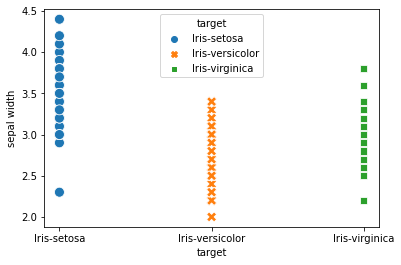

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='target', y='sepal width', hue='target', style='target', s=100, data=data)
plt.show()

- 정규성 검정

In [18]:
print(stats.shapiro(setosa))
print(stats.shapiro(versicolor))
print(stats.shapiro(virginica))

ShapiroResult(statistic=0.968691885471344, pvalue=0.20465604960918427)
ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507)
ShapiroResult(statistic=0.9673910140991211, pvalue=0.1809043288230896)


0.05보다 크므로 귀무가설을 기각할 수 없다. 즉 정규성을 따른다.

- 등분산 검정

In [19]:
stats.levene(setosa, versicolor, virginica)

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)

p-value가 0.05보다 크므로 귀무가설을 기각할 수 없다. 즉 등분산 가정을 만족한다.

In [20]:
stats.f_oneway(setosa, versicolor, virginica)

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

p-value가 0.05보다 작으므로 귀무가설을 기각한다. 즉 집단간 모평균이 모두 같다고 할 수 없다.

-> 사후검정

C:\Users\taeeu\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.001,-0.8092,-0.4868,True
Iris-setosa,Iris-virginica,-0.444,0.001,-0.6052,-0.2828,True
Iris-versicolor,Iris-virginica,0.204,0.0089,0.0428,0.3652,True


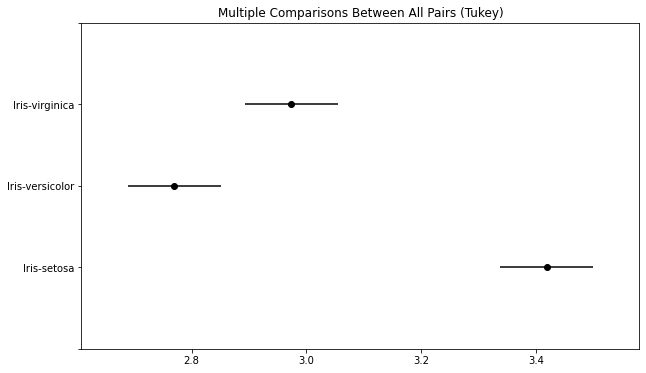

In [22]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc=MultiComparison(data=data["sepal width"], groups=data["target"])
tukeyhsd=mc.tukeyhsd(alpha=0.05)
fig=tukeyhsd.plot_simultaneous()
tukeyhsd.summary()